# <center> <b> <h1>   3. SVM Support - 1 -Optimal </h1></b></center>

In [28]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn import datasets, svm
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

import pandas as pd
import itertools

PATH_RANKINGS = "../2. SVM RFE (ranking)/output/"
PATH_DATASETS = "../../2_Data_preparation/2_Split_Raw_Datasets/output/"

In [29]:
def readCsvs(split):
    datasets = []
    constant1 = 'X_'
    constant2 = '_' + split
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_DATASETS + constant1 + feature + constant2 +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

In [30]:
def readRankings():
    datasets = []
    constant1 = 'SVMRFE (Support - 1)_less_max_inter'
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_RANKINGS + constant1 + feature +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

# Prepare The Data

In [31]:
support_data = readRankings()
support_data[0]['data'].head()

,Ranking,Support
Name,,
lh_S_temporal_transverse_area,True,1
rh_S_suborbital_area,True,1
rh_S_collat_transv_ant_area,True,1
rh_S_circular_insula_inf_area,True,1
rh_S_circular_insula_ant_area,True,1


In [32]:
df_X_tr = readCsvs('train')
df_X_tr[0]['data'].shape

(550, 148)

In [33]:
df_y_train = pd.read_csv(PATH_DATASETS + 'Y_train.csv', index_col = 0)
df_y_train.shape

(550, 1)

In [34]:
df_X_val = readCsvs('validate')
df_X_val[0]['data'].shape

(338, 148)

In [35]:
df_y_val = pd.read_csv(PATH_DATASETS + 'Y_validate.csv', index_col = 0)
df_y_val.shape

(338, 1)

### selecting the features thar are in the ranking 

In [36]:
for feature_train, feature_validate, ranking in zip(df_X_tr, df_X_val, support_data):
    data_train = feature_train['data']
    data_validate = feature_validate['data']
    data_ranking = ranking['data']
    
    feature_train['data'] = data_train[data_ranking.index.values].copy()
    feature_validate['data'] = data_validate[data_ranking.index.values].copy()

In [37]:
df_X_val[0]['data'].shape

(338, 15)

# 2. Grid Search CV

In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]} 
scores = ['precision', 'recall']
best_c = []

for feature_train, feature_validate in zip(df_X_tr, df_X_val):
    
    data_name = feature_train['name']
    data_train = feature_train['data']
    data_validate = feature_validate['data']
    
    print("******************************** GRID SEARCH FOR: " + data_name + " ******************************")
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(SVC(kernel='linear'),param_grid, verbose=0, n_jobs=-1, scoring='%s_macro' % score, cv=5)
        clf.fit(data_train, df_y_train)
        
        if (score == 'precision'):
            best_c.append({'name' : data_name, 'data' : clf.best_params_})

        print("Best parameters set found on development set: ", clf.best_params_)
        print("Grid scores on develpment set: ")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                 %(mean, std * 2, params))

        print("Detailed Classification Report: ")
        print("the model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        y_true, y_pred = df_y_val, clf.predict(data_validate)
        print(classification_report(y_true,y_pred))
        print()

******************************** GRID SEARCH FOR: area ******************************
# Tuning hyper-parameters for precision



/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:  {'C': 0.001}
Grid scores on develpment set: 
0.647 (+/-0.160) for {'C': 0.001}
0.647 (+/-0.160) for {'C': 0.01}
0.647 (+/-0.160) for {'C': 0.1}
0.647 (+/-0.160) for {'C': 1}
0.647 (+/-0.160) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

          -1       0.68      0.72      0.70       173
           1       0.69      0.64      0.66       165

    accuracy                           0.68       338
   macro avg       0.68      0.68      0.68       338
weighted avg       0.68      0.68      0.68       338


# Tuning hyper-parameters for recall

Best parameters set found on development set:  {'C': 0.001}
Grid scores on develpment set: 
0.645 (+/-0.159) for {'C': 0.001}
0.645 (+/-0.159) for {'C': 0.01}
0.645 (+/-0.159) for {'C': 0.1}
0.645 (+/-0.159) for {'C': 1}
0.645 (+/-0.159) for {'C':

/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:  {'C': 10}
Grid scores on develpment set: 
0.587 (+/-0.145) for {'C': 0.001}
0.587 (+/-0.145) for {'C': 0.01}
0.587 (+/-0.145) for {'C': 0.1}
0.609 (+/-0.106) for {'C': 1}
0.662 (+/-0.065) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

          -1       0.72      0.68      0.70       173
           1       0.68      0.72      0.70       165

    accuracy                           0.70       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.70      0.70      0.70       338


# Tuning hyper-parameters for recall



/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:  {'C': 10}
Grid scores on develpment set: 
0.529 (+/-0.060) for {'C': 0.001}
0.529 (+/-0.060) for {'C': 0.01}
0.529 (+/-0.060) for {'C': 0.1}
0.551 (+/-0.064) for {'C': 1}
0.658 (+/-0.058) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

          -1       0.72      0.68      0.70       173
           1       0.68      0.72      0.70       165

    accuracy                           0.70       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.70      0.70      0.70       338


******************************** GRID SEARCH FOR: thickness ******************************
# Tuning hyper-parameters for precision

Best parameters set found on development set:  {'C': 1}
Grid scores on develpment set: 
0.663 (+/-0.140) for {'C': 0.001}
0.663 (+/-0.140) for {'C': 0.01}
0

/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          -1       0.78      0.73      0.75       173
           1       0.73      0.78      0.76       165

    accuracy                           0.75       338
   macro avg       0.76      0.76      0.75       338
weighted avg       0.76      0.75      0.75       338


# Tuning hyper-parameters for recall

Best parameters set found on development set:  {'C': 1}
Grid scores on develpment set: 
0.591 (+/-0.128) for {'C': 0.001}
0.591 (+/-0.128) for {'C': 0.01}
0.696 (+/-0.047) for {'C': 0.1}
0.749 (+/-0.058) for {'C': 1}
0.731 (+/-0.067) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.


/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          -1       0.78      0.73      0.75       173
           1       0.73      0.78      0.76       165

    accuracy                           0.75       338
   macro avg       0.76      0.76      0.75       338
weighted avg       0.76      0.75      0.75       338


******************************** GRID SEARCH FOR: volume ******************************
# Tuning hyper-parameters for precision



/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:  {'C': 0.001}
Grid scores on develpment set: 
0.645 (+/-0.035) for {'C': 0.001}
0.610 (+/-0.049) for {'C': 0.01}
0.619 (+/-0.061) for {'C': 0.1}
0.621 (+/-0.070) for {'C': 1}
0.613 (+/-0.069) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

          -1       0.67      0.68      0.68       173
           1       0.66      0.65      0.66       165

    accuracy                           0.67       338
   macro avg       0.67      0.67      0.67       338
weighted avg       0.67      0.67      0.67       338


# Tuning hyper-parameters for recall



/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters set found on development set:  {'C': 0.001}
Grid scores on develpment set: 
0.644 (+/-0.035) for {'C': 0.001}
0.609 (+/-0.050) for {'C': 0.01}
0.618 (+/-0.061) for {'C': 0.1}
0.620 (+/-0.070) for {'C': 1}
0.613 (+/-0.069) for {'C': 10}
Detailed Classification Report: 
the model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

          -1       0.67      0.68      0.68       173
           1       0.66      0.65      0.66       165

    accuracy                           0.67       338
   macro avg       0.67      0.67      0.67       338
weighted avg       0.67      0.67      0.67       338




In [16]:
best_c

[{'name': 'area', 'data': {'C': 10, 'gamma': 0.001}},
 {'name': 'meancurv', 'data': {'C': 10, 'gamma': 1}},
 {'name': 'thickness', 'data': {'C': 10, 'gamma': 0.1}},
 {'name': 'volume', 'data': {'C': 0.001, 'gamma': 0.001}}]

In [17]:
clfs = []
for feature, feature_tr in zip (best_c, df_X_tr):
    c = feature['data']['C']
    data_name = feature_tr['name']
    df_train = feature_tr['data']
    
    # create and train
    clf = svm.SVC(kernel='linear', C = c)
    clf.fit(df_train, df_y_train)
    
    #checking the score 
    print("Score for " + data_name + ": ", clf.score(df_train,df_y_train))
    
    #saving the classificator
    joblib.dump(clf, 'output/SVM (Support - 1 - optimal)_less_max_inter' + data_name +'.pkl')
    
    #saving an instance  of the clf 
    clfs.append({'name' : data_name, 'data' : clf})

/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score for area:  0.6709090909090909
Score for meancurv:  0.7254545454545455
Score for thickness:  0.7763636363636364


/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/students/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score for volume:  0.7745454545454545


# Confusion Matrix

In [25]:
def plot_confusion_matrix(cm, classes, normalize = False,
                         title = 'Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalie = True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: np.newaxis]
        print("Cormalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    # '.2f' limits float to two decimal point
    # 'd' number decimal
    fmt = '.2f' if normalize else 'd' 
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format (cm[i,j], fmt), horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[125  48]
 [ 60 105]]
Cormalized confusion matrix
[[0.72 0.29]
 [0.35 0.64]]


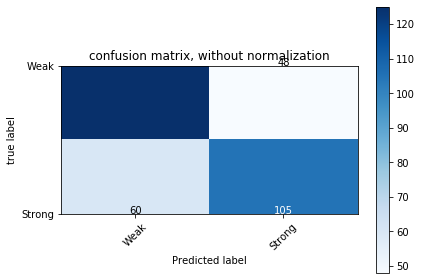

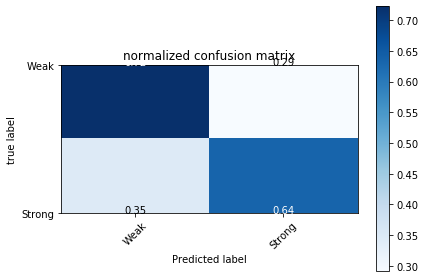

Confusion matrix, without normalization
[[117  56]
 [ 46 119]]
Cormalized confusion matrix
[[0.68 0.34]
 [0.27 0.72]]


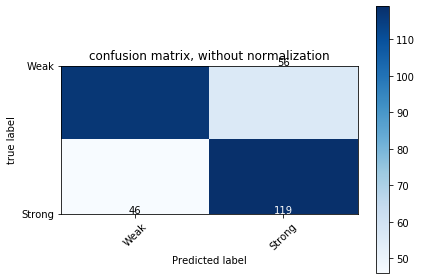

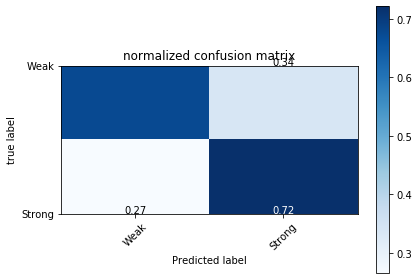

Confusion matrix, without normalization
[[118  55]
 [ 40 125]]
Cormalized confusion matrix
[[0.68 0.33]
 [0.23 0.76]]


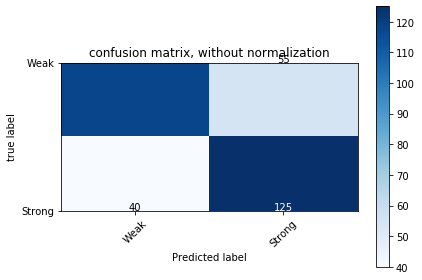

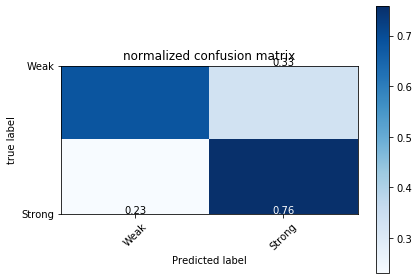

Confusion matrix, without normalization
[[118  55]
 [ 57 108]]
Cormalized confusion matrix
[[0.68 0.33]
 [0.33 0.65]]


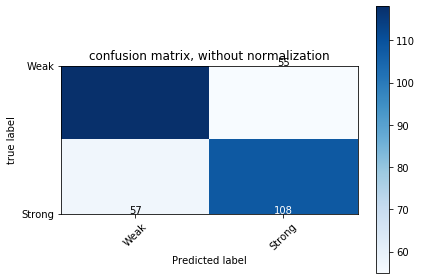

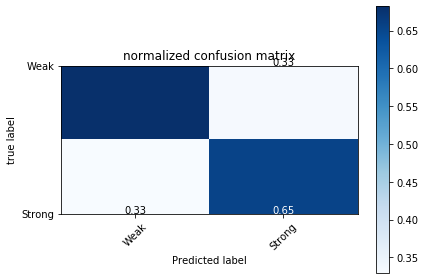

In [26]:
for feature, clf in zip(df_X_val, clfs):
    data = feature['data']
    name = feature['name']
    clf_data = clf['data']
    
    # Compute Confusion matrix
    cnf_matrix = confusion_matrix(df_y_val['class'].values, clf_data.predict(data))
    np.set_printoptions(precision=2)

    # Plot non-normalied confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Weak', 'Strong'],
                         title='confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Weak', 'Strong'], normalize=True,
                         title='normalized confusion matrix')
    plt.show()
